In [16]:
from helpers import *
from create_album_jsons import *
import json
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
rankings = [
    {
        'album': 'Even in Arcadia',
        'artist': 'Sleep Token',
        'spotify_id': '1lS7FeRcSUuIGqyg99UGpj',
        'Yagiz': [1, 3, 0, 8, 5],
        'Tugba': [1, 3, 7, 0, 5],
    },
    {
        'album': 'The New Abnormal',
        'artist': 'The Strokes',
        'spotify_id': '2xkZV2Hl1Omi8rk2D7t5lN',
        'Yagiz': [0, 8, 6, 2, 1],
        'Tugba': [8, 1, 0, 2, 6],
    },
    
    {
        'album': 'BODIES',
        'artist': 'Thornhill',
        'spotify_id': '5bJeb7bvHrxNvZ6UskCoqm',
        'Yagiz': [1, 2, 10, 9, 5],
        'Tugba': [10, 2, 3, 5, 1],
    },
    
    {
        'album': 'Skinty Fia',
        'artist': 'Fontaines D.C.',
        'spotify_id': '0aVN6rMKthfuAdDXn8RTXf',
        'Yagiz': [8, 5, 0, 7, 3],
        'Tugba': [8, 3, 5, 1, 4],
    },
    {
        'album': 'Radiant Dark',
        'artist': 'If I Were You',
        'spotify_id': '2qGyywbFxucSBkPMPgfQ2w',
        'Yagiz': [5, 2, 9, 1, 0],
        'Tugba': [2, 4, 9, 5, 1],
    },
    {
        'album': 'Boxer',
        'artist': 'The National',
        'spotify_id': '2pG7mDkQhia2OyGE6fbkmJ',
        'Yagiz': [1, 5, 0, 6, 9],
        'Tugba': [1, 6, 0, 11, 5],
    },
    {
        'album': 'Take Me Back To Eden',
        'artist': 'Sleep Token',
        'spotify_id': '1gjugH97doz3HktiEjx2vY',
        'Yagiz': [7, 10, 9, 4, 0],
        'Tugba': [10, 7, 9, 0, 2],
    },
]

ranking_df = pd.DataFrame(rankings)

In [13]:
ranking_loss_df = compute_ranking_losses_extended(ranking_df)
ranking_loss_df = extend_df_with_spotify(ranking_loss_df)
ranking_loss_df = ranking_loss_df[['album', 'artist', 'spotify_id', 'Yagiz', 'Tugba', 'Spotify', 'loss_y_vs_t', 'loss_y_vs_s', 'loss_t_vs_s']]
ranking_loss_df

,album,artist,spotify_id,Yagiz,Tugba,Spotify,loss_y_vs_t,loss_y_vs_s,loss_t_vs_s
0,Even in Arcadia,Sleep Token,1lS7FeRcSUuIGqyg99UGpj,"[1, 3, 0, 8, 5]","[1, 3, 7, 0, 5]","[3, 4, 0, 1, 2]",6,14,16
1,The New Abnormal,The Strokes,2xkZV2Hl1Omi8rk2D7t5lN,"[0, 8, 6, 2, 1]","[8, 1, 0, 2, 6]","[0, 1, 8, 6, 2]",8,6,6
2,BODIES,Thornhill,5bJeb7bvHrxNvZ6UskCoqm,"[1, 2, 10, 9, 5]","[10, 2, 3, 5, 1]","[7, 2, 6, 5, 1]",12,20,18
3,Skinty Fia,Fontaines D.C.,0aVN6rMKthfuAdDXn8RTXf,"[8, 5, 0, 7, 3]","[8, 3, 5, 1, 4]","[8, 3, 5, 1, 7]",14,10,2
4,Radiant Dark,If I Were You,2qGyywbFxucSBkPMPgfQ2w,"[5, 2, 9, 1, 0]","[2, 4, 9, 5, 1]","[2, 3, 4, 1, 0]",10,18,14
5,Boxer,The National,2pG7mDkQhia2OyGE6fbkmJ,"[1, 5, 0, 6, 9]","[1, 6, 0, 11, 5]","[0, 1, 2, 3, 4]",8,22,22
6,Take Me Back To Eden,Sleep Token,1gjugH97doz3HktiEjx2vY,"[7, 10, 9, 4, 0]","[10, 7, 9, 0, 2]","[1, 9, 2, 10, 0]",6,20,16


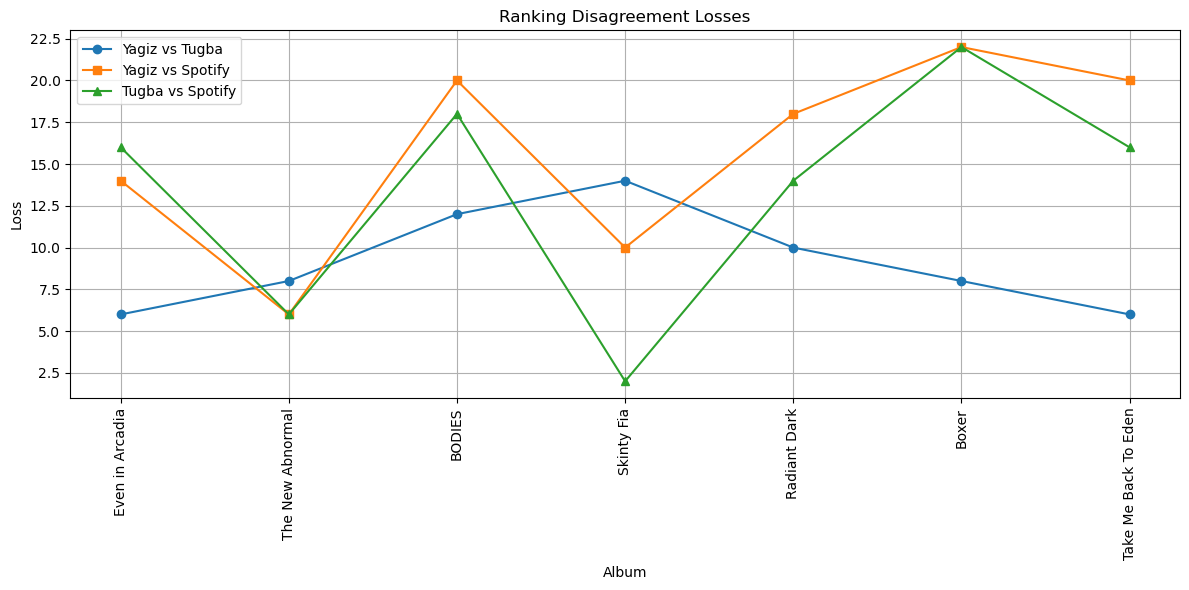

In [14]:
plot_all_ranking_losses(ranking_loss_df)

In [17]:
output = [
    {
        'album': row['album'],
        'artist': row['artist'],
        'spotify_id': row['spotify_id'],
        'Yagiz': row['Yagiz'],
        'Tugba': row['Tugba'],
        'Spotify': row['Spotify'],
        'loss_y_vs_t': row['loss_y_vs_t'],
        'loss_y_vs_s': row['loss_y_vs_s'],
        'loss_t_vs_s': row['loss_t_vs_s'],
    }
    for _, row in ranking_loss_df.iterrows()
]

with open('albums.json', 'w') as f:
    json.dump(output, f, indent=2)

In [18]:
for album in rankings:
    generate_album_json(
        album_id=album['spotify_id'],
        album_slug=make_slug(album['album']),
        yagiz_ranks=album['Yagiz'],
        tugba_ranks=album['Tugba']
    )

Saved albums/even-in-arcadia.json
Saved albums/the-new-abnormal.json
Saved albums/bodies.json
Saved albums/skinty-fia.json
Saved albums/radiant-dark.json
Saved albums/boxer.json
Saved albums/take-me-back-to-eden.json
